In [ ]:
import os
import pandas as pd


0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
import matplotlib

# 下載台北思源黑體
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

# 添加台北思源黑體到 Matplotlib 字體管理器
matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
# 設置字體為台北思源黑體
matplotlib.rc('font', family='Taipei Sans TC Beta')


--2024-12-16 17:15:23--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.31.102, 142.250.31.101, 142.250.31.139, ...
Connecting to drive.google.com (drive.google.com)|142.250.31.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-12-16 17:15:23--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.31.132, 2607:f8b0:4004:c08::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.31.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  38.1MB/s    in 0.5s    

2024-12-16 17:15:

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/wh1t3whytte/Calculation-Thinking/251521e4737d391e2aff14b986dfd418f3cd6a9e/emotional_monitoring_dataset_with_target.csv"

df = pd.read_csv(url)
print(df.head())


   HeartRate  SkinConductance        EEG  Temperature  PupilDiameter  \
0         61         8.937204  11.794946    36.501723       3.330181   
1         60        12.635397  19.151412    36.618910       3.428995   
2         81         3.660028   6.226098    36.176898       2.819286   
3        119         0.563070   4.542968    37.205293       2.192961   
4        118         0.477378   0.996209    37.248118       2.450139   

   SmileIntensity  FrownIntensity  CortisolLevel  ActivityLevel  \
0        0.689238        0.189024       0.603035            136   
1        0.561056        0.091367       0.566671            155   
2        0.417951        0.227355       1.422475             55   
3        0.140186        0.502965       1.669045             39   
4        0.064471        0.695604       1.854076             10   

   AmbientNoiseLevel  LightingLevel     EmotionalState CognitiveState  \
0                 59            394            engaged     distracted   
1                 

In [ ]:
# 確認資料概覽
print("數據概覽：\n", df.head())
print("數據資訊：\n", df.info())

# 確認缺失值
print("缺失值統計：\n", df.isnull().sum())

# 定義特徵欄位和目標變量
features_columns = [
    "HeartRate", "SkinConductance", "EEG", "Temperature",
    "PupilDiameter", "SmileIntensity", "FrownIntensity",
    "CortisolLevel", "ActivityLevel", "AmbientNoiseLevel", "LightingLevel"
]

# 處理缺失值（填補或刪除）
df = df.dropna(subset=features_columns + ["EngagementLevel", "CognitiveState", "EmotionalState"])

# 將特徵轉為數值格式
X = df[features_columns].apply(pd.to_numeric, errors='coerce')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

數據概覽：
    HeartRate  SkinConductance        EEG  Temperature  PupilDiameter  \
0         61         8.937204  11.794946    36.501723       3.330181   
1         60        12.635397  19.151412    36.618910       3.428995   
2         81         3.660028   6.226098    36.176898       2.819286   
3        119         0.563070   4.542968    37.205293       2.192961   
4        118         0.477378   0.996209    37.248118       2.450139   

   SmileIntensity  FrownIntensity  CortisolLevel  ActivityLevel  \
0        0.689238        0.189024       0.603035            136   
1        0.561056        0.091367       0.566671            155   
2        0.417951        0.227355       1.422475             55   
3        0.140186        0.502965       1.669045             39   
4        0.064471        0.695604       1.854076             10   

   AmbientNoiseLevel  LightingLevel     EmotionalState CognitiveState  \
0                 59            394            engaged     distracted   
1          

處理 1 類別...
1 的 K-Fold 交叉驗證平均準確率: 0.9970
1 的每折準確率: [1.    0.995 1.    0.995 0.995]



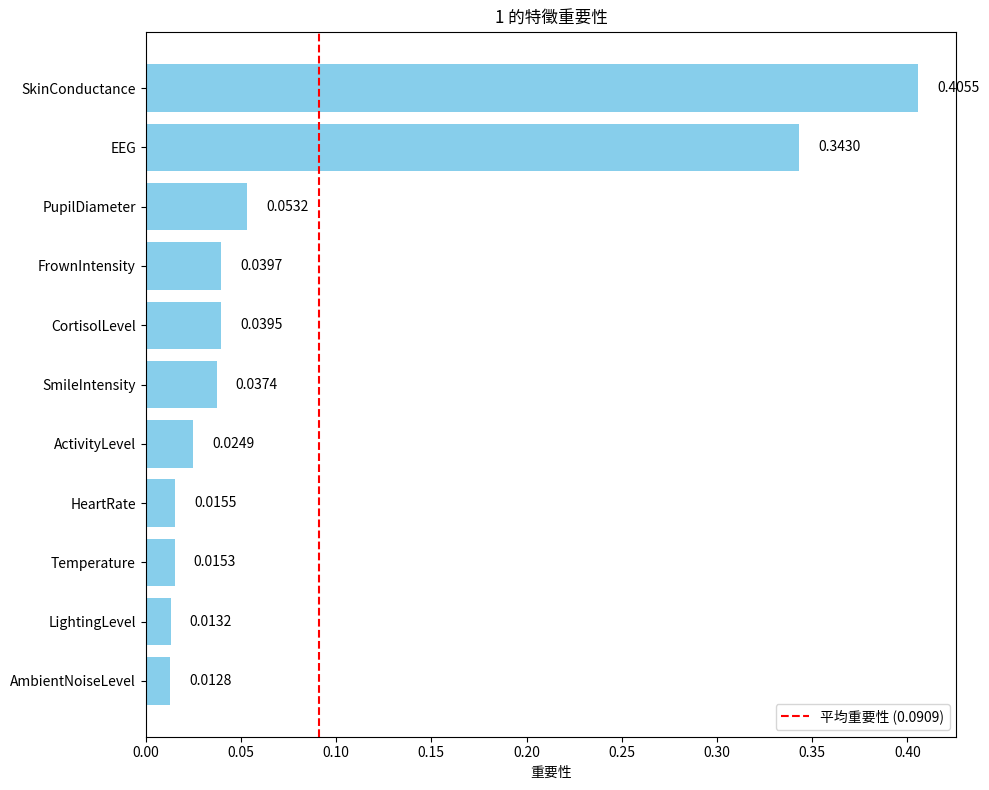

1 的特徵重要性:
SkinConductance: 0.4055
EEG: 0.3430
PupilDiameter: 0.0532
FrownIntensity: 0.0397
CortisolLevel: 0.0395
SmileIntensity: 0.0374
ActivityLevel: 0.0249
HeartRate: 0.0155
Temperature: 0.0153
LightingLevel: 0.0132
AmbientNoiseLevel: 0.0128


處理 2 類別...
2 的 K-Fold 交叉驗證平均準確率: 1.0000
2 的每折準確率: [1. 1. 1. 1. 1.]



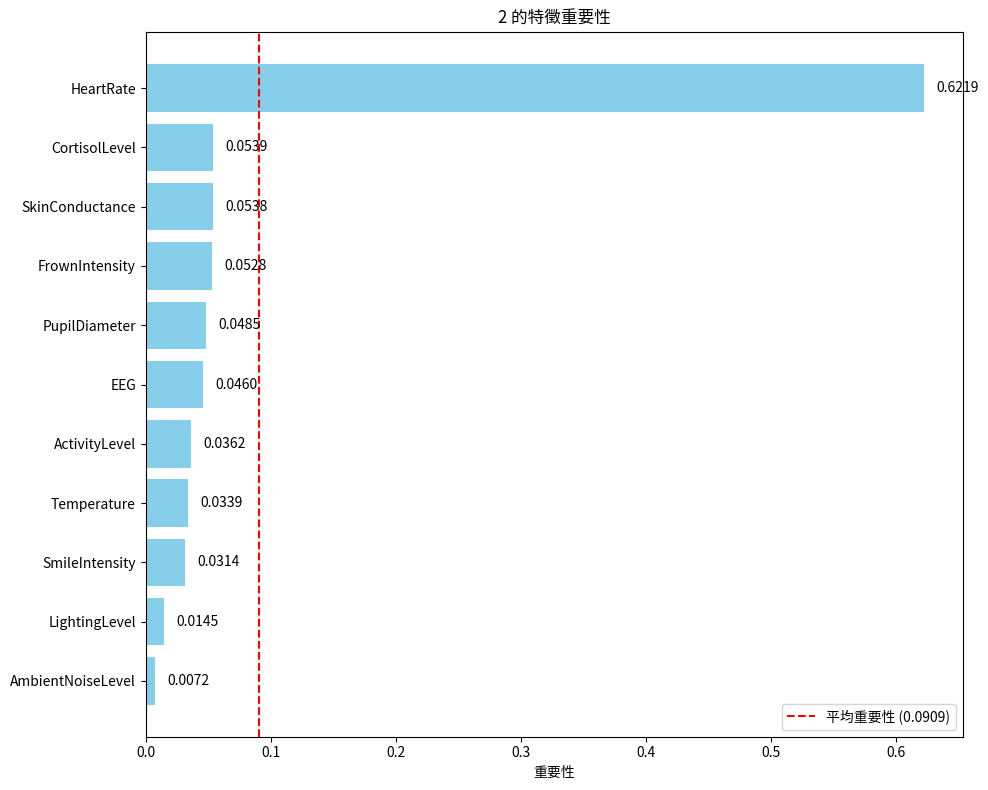

2 的特徵重要性:
HeartRate: 0.6219
CortisolLevel: 0.0539
SkinConductance: 0.0538
FrownIntensity: 0.0528
PupilDiameter: 0.0485
EEG: 0.0460
ActivityLevel: 0.0362
Temperature: 0.0339
SmileIntensity: 0.0314
LightingLevel: 0.0145
AmbientNoiseLevel: 0.0072


處理 3 類別...
3 的 K-Fold 交叉驗證平均準確率: 0.9980
3 的每折準確率: [1.    0.995 1.    1.    0.995]



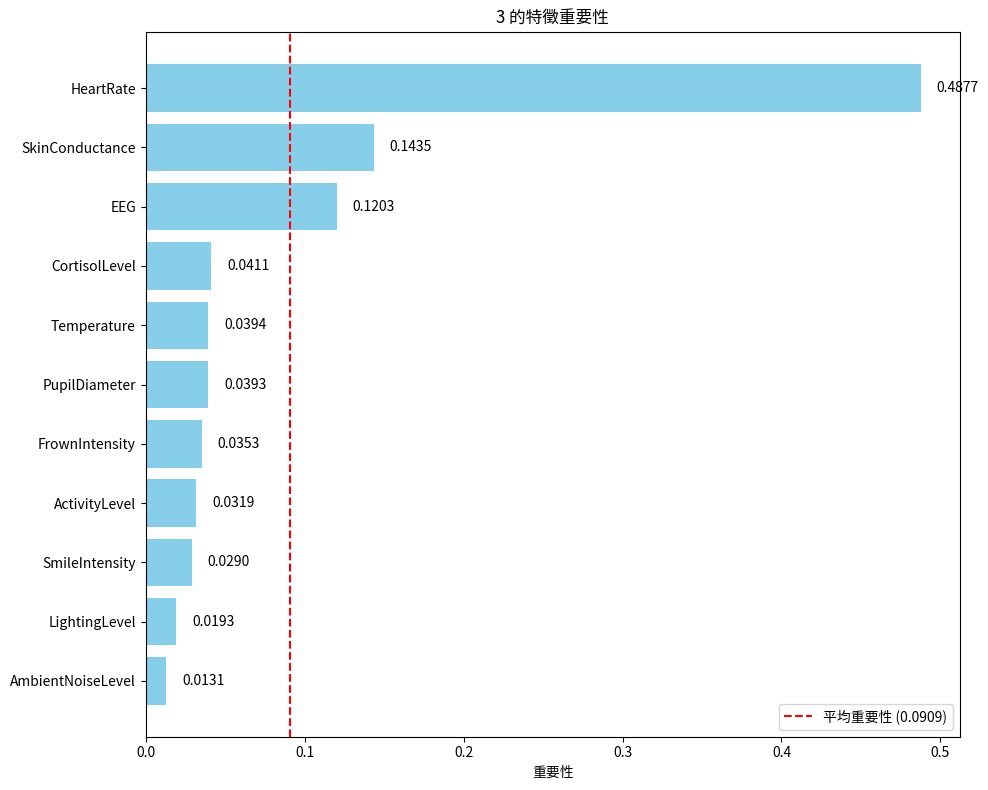

3 的特徵重要性:
HeartRate: 0.4877
SkinConductance: 0.1435
EEG: 0.1203
CortisolLevel: 0.0411
Temperature: 0.0394
PupilDiameter: 0.0393
FrownIntensity: 0.0353
ActivityLevel: 0.0319
SmileIntensity: 0.0290
LightingLevel: 0.0193
AmbientNoiseLevel: 0.0131


所有類別的模型結果:
1: K-Fold 交叉驗證平均準確率 = 0.9970
2: K-Fold 交叉驗證平均準確率 = 1.0000
3: K-Fold 交叉驗證平均準確率 = 0.9980


In [ ]:
# 定義要分析的工業區類別
industrial_areas = [1, 2, 3]  # 使用整數類別

# 選擇特徵欄位
features_columns = [
    "HeartRate", "SkinConductance", "EEG", "Temperature",
    "PupilDiameter", "SmileIntensity", "FrownIntensity",
    "CortisolLevel", "ActivityLevel", "AmbientNoiseLevel", "LightingLevel"
]

# 創建字典來存儲每個類別的結果
results = {}

# 為每個工業區類別分別建立模型
for area in industrial_areas:
    print(f'處理 {area} 類別...')

    # 創建二元目標變量，1表示該類別，0表示其他類別
    df_filtered = df.copy()
    df_filtered['is_target_area'] = df_filtered['EngagementLevel'].apply(lambda x: 1 if x == area else 0)

    # 提取特徵和目標變量
    X = df_filtered[features_columns]
    y = df_filtered['is_target_area']

    # 將特徵欄位轉換為數字，無法轉換的設置為 NaN
    X = X.apply(pd.to_numeric, errors='coerce')

    # 對特徵進行標準化
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 定義 K-Fold 交叉驗證（K=5）
    kfold = KFold(n_splits=5, shuffle=True, random_state=1000)

    # 訓練隨機森林分類器並進行 K-Fold 交叉驗證
    clf = RandomForestClassifier(random_state=1000)
    cv_scores = cross_val_score(clf, X_scaled, y, cv=kfold, scoring='accuracy')

    # 計算交叉驗證的平均準確率
    mean_accuracy = np.mean(cv_scores)
    print(f'{area} 的 K-Fold 交叉驗證平均準確率: {mean_accuracy:.4f}')
    print(f'{area} 的每折準確率: {cv_scores}\n')

    # 使用整個資料集進行訓練
    clf.fit(X_scaled, y)

    # 獲取特徵重要性
    feature_importances = clf.feature_importances_
    feature_importance_dict = dict(zip(features_columns, feature_importances))

    # 將結果存儲在字典中
    results[area] = {
        'model': clf,
        'mean_cv_accuracy': mean_accuracy,
        'cv_scores': cv_scores,
        'feature_importances': feature_importance_dict
    }

    # 進行排序
    sorted_features = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)
    sorted_feature_names = [feature for feature, importance in sorted_features]
    sorted_feature_importances = [importance for feature, importance in sorted_features]

    # 計算特徵重要性的平均值
    avg_importance = np.mean(sorted_feature_importances)

    # 繪製特徵重要性圖
    plt.figure(figsize=(10, 8))
    bars = plt.barh(sorted_feature_names, sorted_feature_importances, color='skyblue')
    plt.xlabel('重要性')
    plt.title(f'{area} 的特徵重要性')

    # 添加平均線
    plt.axvline(avg_importance, color='red', linestyle='--', label=f'平均重要性 ({avg_importance:.4f})')

    # 在每個條形上添加對應的數值
    for bar, importance in zip(bars, sorted_feature_importances):
        plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
                 f'{importance:.4f}', va='center')

    plt.gca().invert_yaxis()  # 讓最重要的特徵顯示在頂部
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 打印每個特徵的重要性
    print(f'{area} 的特徵重要性:')
    for feature, importance in sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True):
        print(f'{feature}: {importance:.4f}')
    print('\n' + '='*50 + '\n')

# 最終輸出所有類別的結果
print("所有類別的模型結果:")
for area, result in results.items():
    print(f'{area}: K-Fold 交叉驗證平均準確率 = {result["mean_cv_accuracy"]:.4f}')


正在測試干預的特徵: HeartRate
特徵: HeartRate, 最佳干預比例: 0.70, 提升後平均參與程度: 0.85, 提升: 0.28


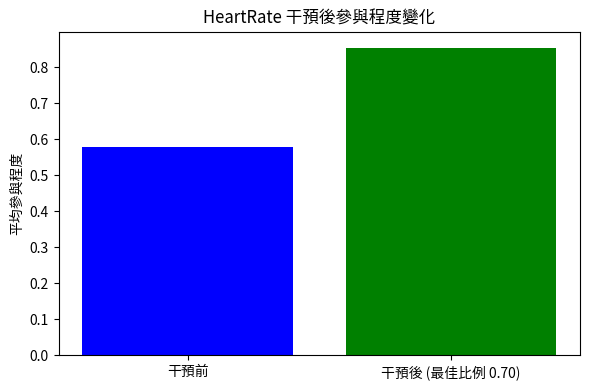


正在測試干預的特徵: SkinConductance
特徵: SkinConductance, 最佳干預比例: 0.50, 提升後平均參與程度: 0.68, 提升: 0.10


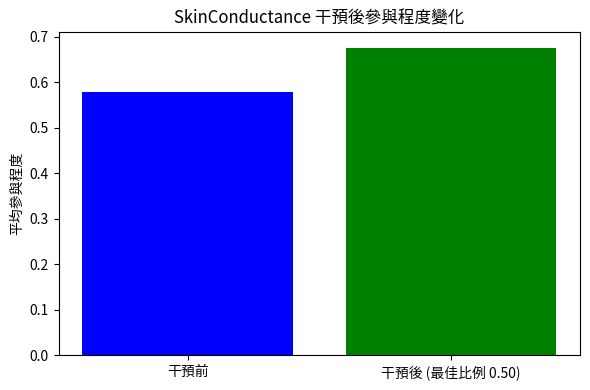


正在測試干預的特徵: EEG
特徵: EEG, 最佳干預比例: 0.50, 提升後平均參與程度: 0.68, 提升: 0.10


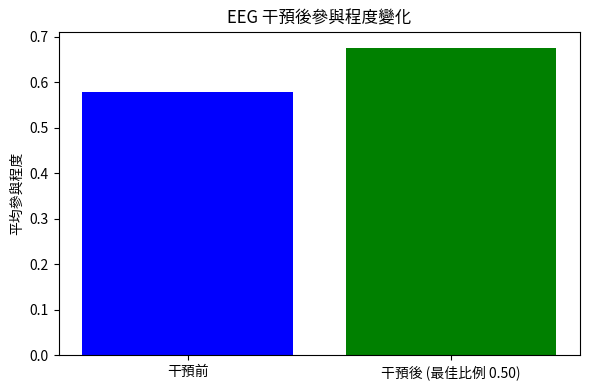


正在測試干預的特徵: Temperature
特徵: Temperature, 不需干預，提升效果為 0

正在測試干預的特徵: PupilDiameter
特徵: PupilDiameter, 不需干預，提升效果為 0

正在測試干預的特徵: SmileIntensity
特徵: SmileIntensity, 不需干預，提升效果為 0

正在測試干預的特徵: FrownIntensity
特徵: FrownIntensity, 不需干預，提升效果為 0

正在測試干預的特徵: CortisolLevel
特徵: CortisolLevel, 不需干預，提升效果為 0

正在測試干預的特徵: ActivityLevel
特徵: ActivityLevel, 不需干預，提升效果為 0

正在測試干預的特徵: AmbientNoiseLevel
特徵: AmbientNoiseLevel, 不需干預，提升效果為 0

正在測試干預的特徵: LightingLevel
特徵: LightingLevel, 不需干預，提升效果為 0

干預結果排序:
特徵: HeartRate, 最佳比例: 0.70, 提升後平均參與程度: 0.85, 提升: 0.28
特徵: SkinConductance, 最佳比例: 0.50, 提升後平均參與程度: 0.68, 提升: 0.10
特徵: EEG, 最佳比例: 0.50, 提升後平均參與程度: 0.68, 提升: 0.10
特徵: Temperature, 不需干預，提升效果為 0
特徵: PupilDiameter, 不需干預，提升效果為 0
特徵: SmileIntensity, 不需干預，提升效果為 0
特徵: FrownIntensity, 不需干預，提升效果為 0
特徵: CortisolLevel, 不需干預，提升效果為 0
特徵: ActivityLevel, 不需干預，提升效果為 0
特徵: AmbientNoiseLevel, 不需干預，提升效果為 0
特徵: LightingLevel, 不需干預，提升效果為 0

正在測試干預的特徵: HeartRate
特徵: HeartRate, 最佳干預比例: 0.70, 提升後平均參與程度: 0.85, 提升: 0.28


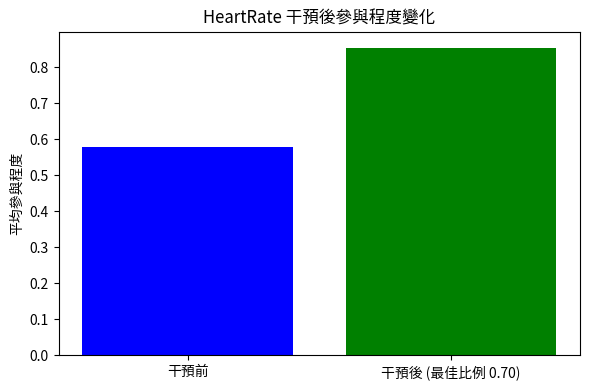


正在測試干預的特徵: SkinConductance
特徵: SkinConductance, 最佳干預比例: 0.50, 提升後平均參與程度: 0.68, 提升: 0.10


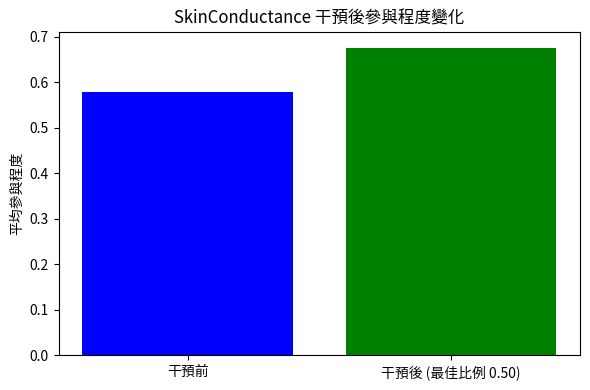


正在測試干預的特徵: EEG
特徵: EEG, 最佳干預比例: 0.50, 提升後平均參與程度: 0.68, 提升: 0.10


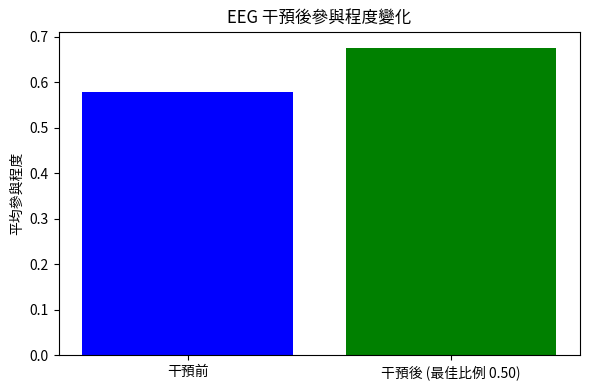


正在測試干預的特徵: Temperature
特徵: Temperature, 不需干預，提升效果為 0

正在測試干預的特徵: PupilDiameter
特徵: PupilDiameter, 不需干預，提升效果為 0

正在測試干預的特徵: SmileIntensity
特徵: SmileIntensity, 不需干預，提升效果為 0

正在測試干預的特徵: FrownIntensity
特徵: FrownIntensity, 不需干預，提升效果為 0

正在測試干預的特徵: CortisolLevel
特徵: CortisolLevel, 不需干預，提升效果為 0

正在測試干預的特徵: ActivityLevel
特徵: ActivityLevel, 不需干預，提升效果為 0

正在測試干預的特徵: AmbientNoiseLevel
特徵: AmbientNoiseLevel, 不需干預，提升效果為 0

正在測試干預的特徵: LightingLevel
特徵: LightingLevel, 不需干預，提升效果為 0

干預結果排序:
特徵: HeartRate, 最佳比例: 0.70, 提升後平均參與程度: 0.85, 提升: 0.28
特徵: HeartRate, 最佳比例: 0.70, 提升後平均參與程度: 0.85, 提升: 0.28
特徵: SkinConductance, 最佳比例: 0.50, 提升後平均參與程度: 0.68, 提升: 0.10
特徵: EEG, 最佳比例: 0.50, 提升後平均參與程度: 0.68, 提升: 0.10
特徵: SkinConductance, 最佳比例: 0.50, 提升後平均參與程度: 0.68, 提升: 0.10
特徵: EEG, 最佳比例: 0.50, 提升後平均參與程度: 0.68, 提升: 0.10
特徵: Temperature, 不需干預，提升效果為 0
特徵: PupilDiameter, 不需干預，提升效果為 0
特徵: SmileIntensity, 不需干預，提升效果為 0
特徵: FrownIntensity, 不需干預，提升效果為 0
特徵: CortisolLevel, 不需干預，提升效果為 0
特徵: ActivityLevel, 不需干預，提升效果為 0
特徵: Ambie

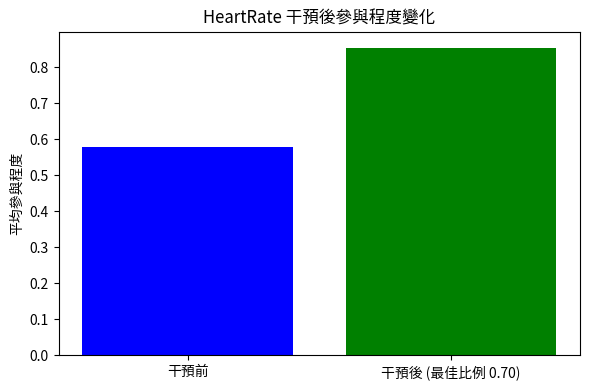


正在測試干預的特徵: SkinConductance
特徵: SkinConductance, 最佳干預比例: 0.50, 提升後平均參與程度: 0.68, 提升: 0.10


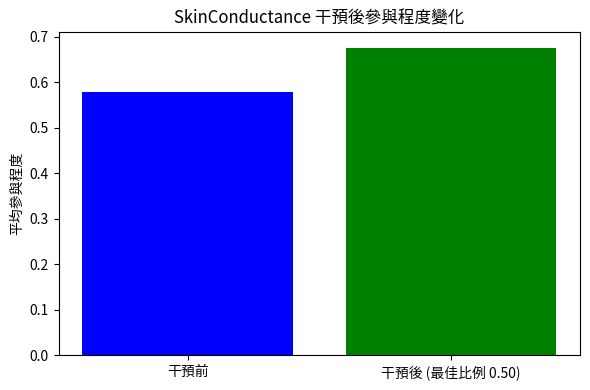


正在測試干預的特徵: EEG
特徵: EEG, 最佳干預比例: 0.50, 提升後平均參與程度: 0.68, 提升: 0.10


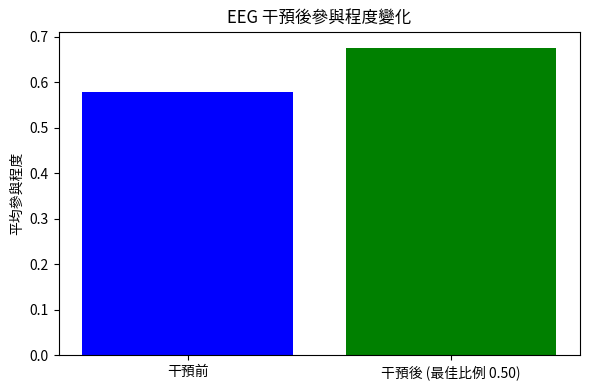


正在測試干預的特徵: Temperature
特徵: Temperature, 不需干預，提升效果為 0

正在測試干預的特徵: PupilDiameter
特徵: PupilDiameter, 不需干預，提升效果為 0

正在測試干預的特徵: SmileIntensity
特徵: SmileIntensity, 不需干預，提升效果為 0

正在測試干預的特徵: FrownIntensity
特徵: FrownIntensity, 不需干預，提升效果為 0

正在測試干預的特徵: CortisolLevel
特徵: CortisolLevel, 不需干預，提升效果為 0

正在測試干預的特徵: ActivityLevel
特徵: ActivityLevel, 不需干預，提升效果為 0

正在測試干預的特徵: AmbientNoiseLevel
特徵: AmbientNoiseLevel, 不需干預，提升效果為 0

正在測試干預的特徵: LightingLevel
特徵: LightingLevel, 不需干預，提升效果為 0

干預結果排序:
特徵: HeartRate, 最佳比例: 0.70, 提升後平均參與程度: 0.85, 提升: 0.28
特徵: HeartRate, 最佳比例: 0.70, 提升後平均參與程度: 0.85, 提升: 0.28
特徵: HeartRate, 最佳比例: 0.70, 提升後平均參與程度: 0.85, 提升: 0.28
特徵: SkinConductance, 最佳比例: 0.50, 提升後平均參與程度: 0.68, 提升: 0.10
特徵: EEG, 最佳比例: 0.50, 提升後平均參與程度: 0.68, 提升: 0.10
特徵: SkinConductance, 最佳比例: 0.50, 提升後平均參與程度: 0.68, 提升: 0.10
特徵: EEG, 最佳比例: 0.50, 提升後平均參與程度: 0.68, 提升: 0.10
特徵: SkinConductance, 最佳比例: 0.50, 提升後平均參與程度: 0.68, 提升: 0.10
特徵: EEG, 最佳比例: 0.50, 提升後平均參與程度: 0.68, 提升: 0.10
特徵: Temperature, 不需干預，提升效果為 0
特徵: PupilDia

In [ ]:
# 對每個干預特徵進行干預模擬
# 排除 Engagement、Cognition 和 Emotional 特徵
exclude_columns = ["EngagementLevel", "Cognition", "Emotional"]
intervention_features = [col for col in features_columns if col not in exclude_columns]

intervention_ratios = np.linspace(0.5, 1.5, 11)  # 定義干預比例範圍
results = []
for factor in exclude_columns:
  for feature in intervention_features:
      print(f"\n正在測試干預的特徵: {feature}")
      best_ratio = None
      max_improvement = -float("inf")
      best_intervention_mean = None

      # 測試每個干預比例
      for ratio in intervention_ratios:
          X_intervention = X.copy()
          X_intervention[feature] *= ratio  # 根據比例調整特徵
          X_intervention_scaled = scaler.transform(X_intervention)

          # 預測干預後的參與程度
          y_pred_intervention = clf.predict(X_intervention_scaled)
          intervention_mean = np.mean(y_pred_intervention)
          original_mean = np.mean(clf.predict(X_scaled))

          # 計算提升幅度
          improvement = intervention_mean - original_mean

          if improvement > max_improvement:
              max_improvement = improvement
              best_ratio = ratio
              best_intervention_mean = intervention_mean

      if max_improvement == 0:
          print(f"特徵: {feature}, 不需干預，提升效果為 0")
      else:
          print(f"特徵: {feature}, 最佳干預比例: {best_ratio:.2f}, 提升後平均參與程度: {best_intervention_mean:.2f}, 提升: {max_improvement:.2f}")

          # 可視化干預效果
          plt.figure(figsize=(6, 4))
          labels = ["干預前", f"干預後 (最佳比例 {best_ratio:.2f})"]
          values = [original_mean, best_intervention_mean]
          plt.bar(labels, values, color=['blue', 'green'])
          plt.title(f"{feature} 干預後參與程度變化")
          plt.ylabel("平均參與程度")
          plt.tight_layout()
          plt.show()

      # 儲存結果
      results.append({
          'feature': feature,
          'best_ratio': best_ratio,
          'original_mean': original_mean,
          'best_intervention_mean': best_intervention_mean,
          'improvement': max_improvement
      })

  # 列出干預結果
  print("\n干預結果排序:")
  results = sorted(results, key=lambda x: x['improvement'], reverse=True)
  for result in results:
      if result['improvement'] == 0:
          print(f"特徵: {result['feature']}, 不需干預，提升效果為 0")
      else:
          print(f"特徵: {result['feature']}, 最佳比例: {result['best_ratio']:.2f}, 提升後平均參與程度: {result['best_intervention_mean']:.2f}, 提升: {result['improvement']:.2f}")
